# Employee Turnover

# Libraries Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.base import clone
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from imblearn.over_sampling import SMOTE

from IPython.display import Image
import matplotlib.image as mpimg

# Load HR_comma_sep.csv Dataset into a DataFrame using Pandas

In [ ]:
og = pd.read_csv('HR_comma_sep.csv')
df = og.copy()

# Data Analysis

## Data Wrangling

In [ ]:
# view first few rows
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
# shape
df.shape

# 14999 rows
# 10 columns

(14999, 10)

In [ ]:
# initial statistics about DataFrame
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
# view column names, and data types
df.info()

# memory usage: 1.1+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
# satisfaction_level should be saved as float32 since number range is not large
df['satisfaction_level'] = df['satisfaction_level'].astype('float32')

# last_evaluation should be saved as float32 since number range is not large
df['last_evaluation'] = df['last_evaluation'].astype('float32')

# number_project should be saved as Int16 since number range is not large
df['number_project'] = df['number_project'].astype('Int16')

# average_montly_hours should be saved as Int16 since number range is not large
df['average_montly_hours'] = df['average_montly_hours'].astype('Int16')

# time_spend_company should be saved as Int16 since number range is not large
df['time_spend_company'] = df['time_spend_company'].astype('Int16')

# Work_accident should be saved as bool since it represents true or false
df['Work_accident'] = df['Work_accident'].astype(bool)

# renamed for consistency
df.rename(columns={'Work_accident': 'work_accident'}, inplace=True)

# left should be saved as bool since it represents true or false
df['left'] = df['left'].astype(bool)

# promotion_last_5years should be saved as Int16 since number range is not large
df['promotion_last_5years'] = df['promotion_last_5years'].astype('Int16')

In [ ]:
# identify missing values
df.isnull().sum()

# there are no missing values

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
work_accident,0
left,0
promotion_last_5years,0
sales,0
salary,0


In [ ]:
# check for duplicate records
df.duplicated().sum()

np.int64(3008)

A large number of duplicated rows were found in the dataset, despite there being no missing values. To better understand this, the rows were grouped and inspected across all features to determine if they were truly identical.

In [ ]:
duplicates_grouped = df[df.duplicated(keep=False)].sort_values(by=list(df.columns))

duplicates_grouped

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,sales,salary
30,0.09,0.62,6,294,4,False,True,0,accounting,low
12030,0.09,0.62,6,294,4,False,True,0,accounting,low
14241,0.09,0.62,6,294,4,False,True,0,accounting,low
71,0.09,0.77,5,275,4,False,True,0,product_mng,medium
12071,0.09,0.77,5,275,4,False,True,0,product_mng,medium
...,...,...,...,...,...,...,...,...,...,...
13089,1.00,0.88,6,201,4,False,False,0,technical,low
11375,1.00,0.93,5,167,3,False,False,0,sales,medium
13586,1.00,0.93,5,167,3,False,False,0,sales,medium
10691,1.00,0.93,5,231,2,False,False,0,marketing,medium


The inspection showed that the rows were truly identical, which is unrealistic. It would suggest that the same employee reported exactly the same values across multiple evaluation periods, which is highly unlikely.

As a result, the duplicated rows were removed to ensure data quality and prevent misleading the analysis.

In [ ]:
# dropping duplicates
df_clean = df.drop_duplicates()

# checking for duplicates again to confirm deletion
df_clean.duplicated().sum()

df = df_clean.copy()

In [ ]:
df.info()

# memory usage: 538.7+ KB
# significantly reduced memory usage

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float32
 1   last_evaluation        11991 non-null  float32
 2   number_project         11991 non-null  Int16  
 3   average_montly_hours   11991 non-null  Int16  
 4   time_spend_company     11991 non-null  Int16  
 5   work_accident          11991 non-null  bool   
 6   left                   11991 non-null  bool   
 7   promotion_last_5years  11991 non-null  Int16  
 8   sales                  11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: Int16(4), bool(2), float32(2), object(2)
memory usage: 538.7+ KB


Save the processed dataset as 'employee_data_cleaned.csv'

In [ ]:
df.to_csv('employee_data_cleaned.csv', index=False)

## Correlation Matrix

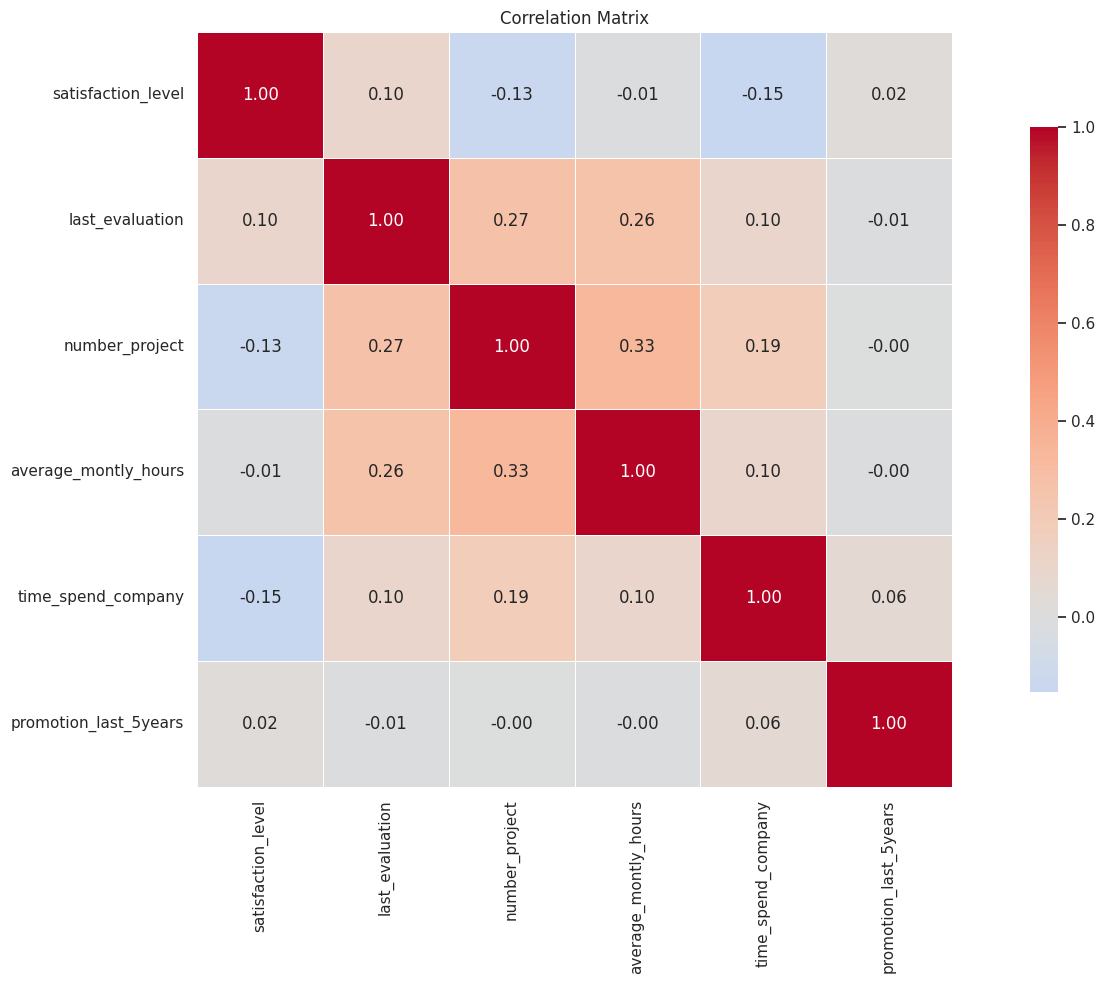

In [ ]:
# select only numerical columns
numerical_df = df.select_dtypes(include='number')

# compute Correlation Matrix
corr_matrix = numerical_df.corr()

# graph on heatmap
plt.figure(figsize=(16, 10))

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={'shrink': 0.75}
)

# add title
plt.title('Correlation Matrix')

plt.tight_layout()
plt.show()

Strongest Positive Correlations:
*   number_project ↔ average_monthly_hours (0.33)
*   number_project ↔ last_evaluation (0.27)
*   average_monthly_hours ↔ last_evaluation (0.26)

Negative Correlations:
*   satisfaction_level ↔ time_spend_company (-0.15)
*   satisfaction_level ↔ number_project  (-0.13)

## Distribution of Employee Satisfaction

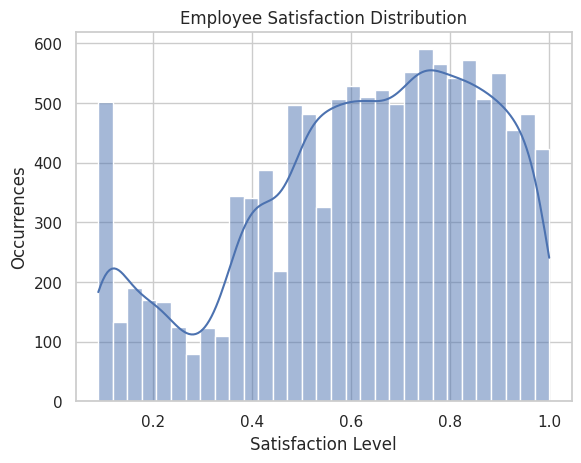

In [ ]:
# create a hist plot of Employee Satisfaction Level
sns.histplot(df['satisfaction_level'], kde=True)

# add title and labels
plt.title('Employee Satisfaction Distribution')
plt.xlabel('Satisfaction Level')
plt.ylabel('Occurrences')

plt.show()

The resulting plot reveals a bimodal distribution of employee satisfaction, characterized by two distinct peaks. The first, smaller peak occurs in the low satisfaction range (approximately 0.1 to 0.2), indicating that a minority of employees are highly dissatisfied. The second and more prominent peak lies within the high satisfaction range (around 0.7 to 0.9), suggesting that a significant portion of the workforce reports being highly satisfied. The middle range (roughly 0.4 to 0.6) appears less concentrated, reflecting fewer employees with neutral satisfaction levels.

## Distribution of Employee Evaluation

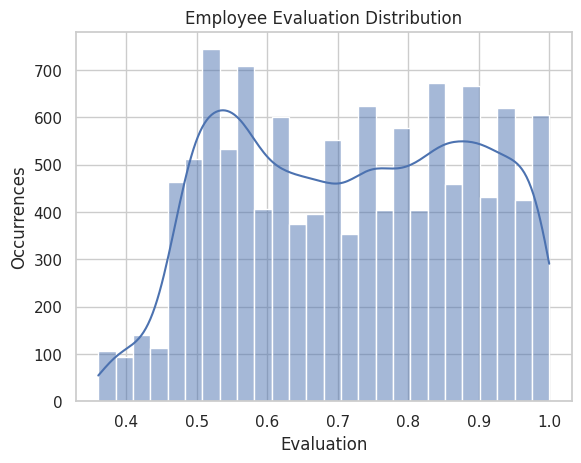

In [ ]:
# create a hist plot of Employee Evaluation
sns.histplot(df['last_evaluation'], kde=True)

# add title and labels
plt.title('Employee Evaluation Distribution')
plt.xlabel('Evaluation')
plt.ylabel('Occurrences')

plt.show()

The employee evaluation distribution is skewed toward higher scores, with most values above 0.5. Very few employees received low evaluations. The plot shows several subtle peaks, suggesting that scores often cluster around specific levels. Overall, the distribution indicates that most employees are evaluated positively, with some variation among top performers.

## Distribution of Employee Average Monthly Hours

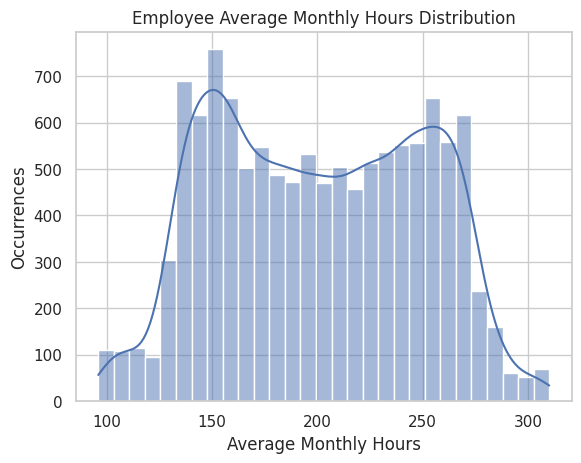

In [ ]:
# create a hist plot of Employee Average Monthly Hours
sns.histplot(df['average_montly_hours'], kde=True)

# add title and labels
plt.title('Employee Average Monthly Hours Distribution')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Occurrences')

plt.show()

The histogram shows a bimodal distribution with peaks around 150 and 250 average monthly hours. This suggests the two groups of employees, one working fewer hours and another working significantly more. This pattern may reflect differences in job types such as part-time versus full-time roles.

## Employee Project Count - Left vs Stayed

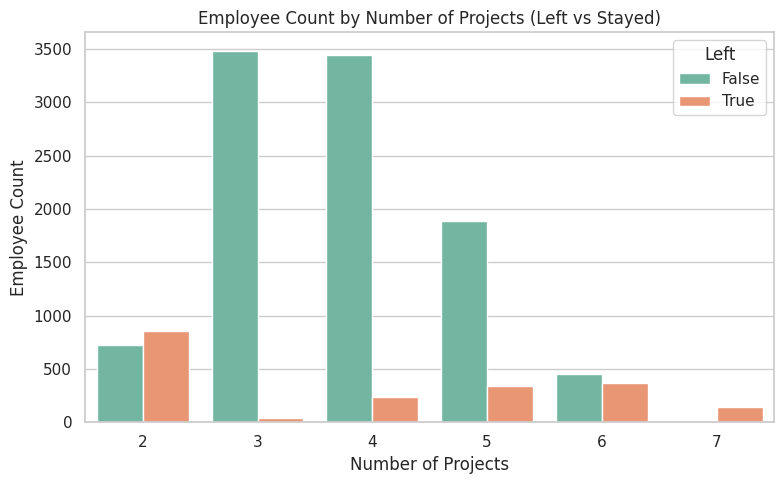

In [ ]:
sns.set_theme(style='whitegrid')

plt.figure(figsize=(8, 5))

sns.countplot(
    data=df,
    x='number_project',
    hue='left',
    palette='Set2',
)

# add title and labels
plt.title('Employee Count by Number of Projects (Left vs Stayed)')
plt.ylabel('Employee Count')
plt.xlabel('Number of Projects')
plt.legend(title='Left')

plt.tight_layout()
plt.show()

The chart shows that most employees worked on 3 or 4 projects, and few in these groups left the company. Higher turnover occurred at the extremes: employees involved in only 2 projects or more than 5 were more likely to leave. This suggests that workload imbalance may have impacted turnover.

# Model Building

## Clustering of Employees Who Left Based on Satisfaction and Evaluation


Employee count per cluster:
cluster
0    902
1    555
2    534
Name: count, dtype: int64


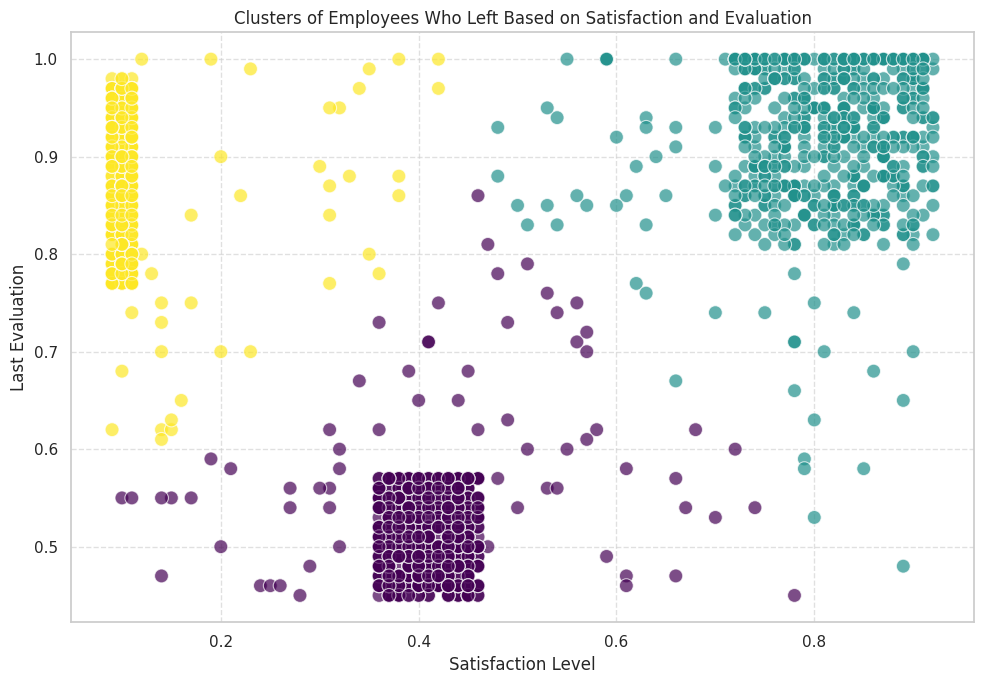

In [ ]:
# Filter for employees who left
df_left = df[df['left'] == True].copy()

# select the features for clustering
X = df_left[['satisfaction_level', 'last_evaluation']]

# perform K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# fit and predict the model on data
df_left.loc[:, 'cluster'] = kmeans.fit_predict(X)

print('\nEmployee count per cluster:')
print(df_left['cluster'].value_counts())

# plot on scatter plot
plt.figure(figsize=(10, 7))

sns.scatterplot(
    data=df_left,
    x='satisfaction_level',
    y='last_evaluation',
    hue='cluster',
    palette='viridis',
    s=100,
    alpha=0.7,
    legend=False
)

# add title and labels
plt.title('Clusters of Employees Who Left Based on Satisfaction and Evaluation')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')

plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('employee_clusters.png', dpi=300)

plt.tight_layout()
plt.show()

Based on the scatter plot and K-means clustering, three distinct groups of employees who left are identified:

1.   Purple cluster: Unsatisfied and low-performing employees, likely disengaged and in need of better support or development opportunities.
2.   Teal cluster: Satisfied and high-performing employees who still left, suggesting external factors or unmet career expectations.
3.   Yellow cluster: High-performing but deeply dissatisfied employees, possibly due to burnout or lack of recognition.

Understanding these groups can help the company design targeted retention strategies to address specific needs and motivations.

## Handling Class Imbalance

### Categorical Features Encoding

In [ ]:
# inspect unique values for sales
df['sales'].value_counts()

,count
sales,
sales,3239
technical,2244
support,1821
IT,976
RandD,694
product_mng,686
marketing,673
accounting,621
hr,601


Using One-Hot Encoding to convert sales to numeric column since there are no inherent order between the values.

In [ ]:
# using one-hot encoding for sales
df = pd.get_dummies(df, columns=['sales'])

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.38,0.53,2,157,3,False,True,0,low,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,False,True,0,medium,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,False,True,0,medium,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,False,True,0,low,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,False,True,0,low,False,False,False,False,False,False,False,True,False,False


In [ ]:
# inspect unique values for salary
df['salary'].value_counts()

,count
salary,
low,5740
medium,5261
high,990


Using Ordinal Encoding to convert sales to numeric column since there is a ordinal relationship in the values. low < medium < high.

In [ ]:
# define explicit order for the salary levels
salary_mapping = {'low': 0, 'medium': 1, 'high': 2}

# apply mapping to salary
df['salary_encoded'] = df['salary'].map(salary_mapping)

# drop original salary column
df = df.drop('salary', axis=1)

# rename salary_encoded to 'salary'
df = df.rename(columns={'salary_encoded': 'salary'})

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary
0,0.38,0.53,2,157,3,False,True,0,False,False,False,False,False,False,False,True,False,False,0
1,0.80,0.86,5,262,6,False,True,0,False,False,False,False,False,False,False,True,False,False,1
2,0.11,0.88,7,272,4,False,True,0,False,False,False,False,False,False,False,True,False,False,1
3,0.72,0.87,5,223,5,False,True,0,False,False,False,False,False,False,False,True,False,False,0
4,0.37,0.52,2,159,3,False,True,0,False,False,False,False,False,False,False,True,False,False,0


### Applying SMOTE

In [ ]:
# select features and target
X = df.drop('left', axis=1)
y = df['left']

# convert all numeric columns to float32 (to avoid type mismatch after SMOTE)
X = X.astype({col: 'float32' for col in X.select_dtypes(include=['int', 'Int16']).columns})

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

print('Before SMOTE:')
print(y_train.value_counts())

# create SMOTE object
smote = SMOTE(random_state=123)

# # apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print('\nAfter SMOTE:')
print(y_train_smote.value_counts())

Before SMOTE:
left
False    7999
True     1593
Name: count, dtype: int64

After SMOTE:
left
False    7999
True     7999
Name: count, dtype: int64


## Logistic Regression Classifier with 5-Fold Cross-Validation

=== Overall Classification Report ===
              precision    recall  f1-score   support

       False       0.82      0.83      0.82      7999
        True       0.83      0.82      0.82      7999

    accuracy                           0.82     15998
   macro avg       0.82      0.82      0.82     15998
weighted avg       0.82      0.82      0.82     15998



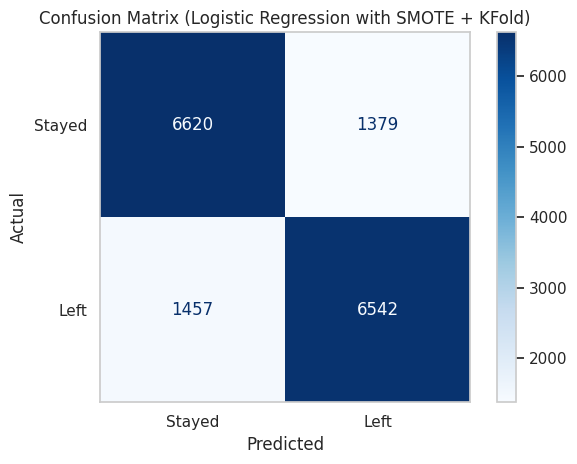

In [ ]:
# create the model object
log_model = LogisticRegression(max_iter=1000, random_state=123)

# define KFold object
kf = KFold(n_splits=5, shuffle=True, random_state=123)

log_all_y_true = []
log_all_y_pred = []
log_all_y_scores = []

for fold, (train_idx, test_idx) in enumerate(kf.split(X_train_smote), 1):

    # split the features and target into training and testing sets for this fold
    X_train, X_test = X_train_smote.iloc[train_idx], X_train_smote.iloc[test_idx]
    y_train, y_test = y_train_smote.iloc[train_idx], y_train_smote.iloc[test_idx]

    # clone model to prevent it from retaining internal state
    model_clone = clone(log_model)

    # fit the model on the current fold's training data
    model_clone.fit(X_train, y_train)

    # predict on test sets
    y_test_pred = model_clone.predict(X_test)
    y_test_proba = model_clone.predict_proba(X_test)[:, 1]

    # accumulate the true target values from this fold
    log_all_y_true.extend(y_test.tolist())

    # accumulate predicted class labels
    log_all_y_pred.extend(y_test_pred.tolist())

    # accumulate predicted probabilities for ROC curve
    log_all_y_scores.extend(y_test_proba.tolist())

# classification report
print('=== Overall Classification Report ===')
print(classification_report(log_all_y_true, log_all_y_pred))

# confusion Matrix
log_cm = confusion_matrix(log_all_y_true, log_all_y_pred)

log_cm_display = ConfusionMatrixDisplay(confusion_matrix = log_cm, display_labels = ['Stayed', 'Left'])

log_cm_display.plot(cmap='Blues')
log_cm_display.ax_.set_title('Confusion Matrix (Logistic Regression with SMOTE + KFold)')
log_cm_display.ax_.set_xlabel('Predicted')
log_cm_display.ax_.set_ylabel('Actual')

plt.grid(False)

plt.tight_layout()
plt.show()

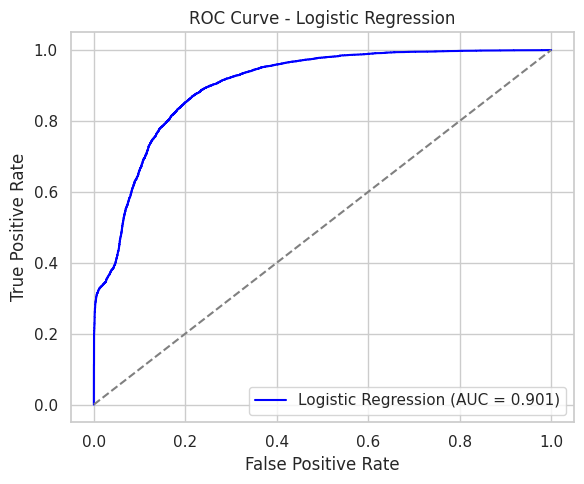

In [ ]:
# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(log_all_y_true, log_all_y_scores)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure(figsize=(6, 5))

plt.plot(fpr, tpr, color='blue', label=f'Logistic Regression (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.title('ROC Curve - Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

plt.grid(True)

plt.tight_layout()
plt.show()

## Random Forest Classifier with 5-Fold Cross-Validation

=== Overall Classification Report ===
              precision    recall  f1-score   support

       False       0.98      1.00      0.99      7999
        True       1.00      0.98      0.99      7999

    accuracy                           0.99     15998
   macro avg       0.99      0.99      0.99     15998
weighted avg       0.99      0.99      0.99     15998



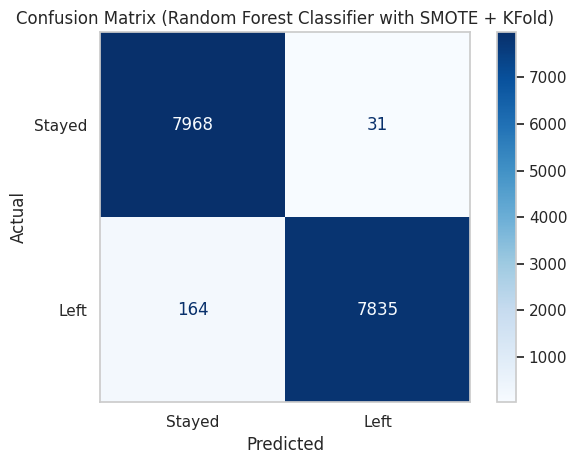

In [ ]:
# create the model object
rfc_model = RandomForestClassifier(random_state=123)

# define KFold object
kf = KFold(n_splits=5, shuffle=True, random_state=123)

rfc_all_y_true = []
rfc_all_y_pred = []
rfc_all_y_scores = []

for fold, (train_idx, test_idx) in enumerate(kf.split(X_train_smote), 1):

    # split the features and target into training and testing sets for this fold
    X_train, X_test = X_train_smote.iloc[train_idx], X_train_smote.iloc[test_idx]
    y_train, y_test = y_train_smote.iloc[train_idx], y_train_smote.iloc[test_idx]

    # clone model to prevent it from retaining internal state
    model_clone = clone(rfc_model)

    # fit the model on the current fold's training data
    model_clone.fit(X_train, y_train)

    # predict on test sets
    y_test_pred = model_clone.predict(X_test)
    y_test_proba = model_clone.predict_proba(X_test)[:, 1]

    # accumulate the true target values from this fold
    rfc_all_y_true.extend(y_test.tolist())

    # accumulate predicted class labels
    rfc_all_y_pred.extend(y_test_pred.tolist())

    # accumulate predicted probabilities for ROC curve
    rfc_all_y_scores.extend(y_test_proba.tolist())

# classification report
print('=== Overall Classification Report ===')
print(classification_report(rfc_all_y_true, rfc_all_y_pred))

# confusion Matrix
rfc_cm = confusion_matrix(rfc_all_y_true, rfc_all_y_pred)
rfc_cm_display = ConfusionMatrixDisplay(confusion_matrix=rfc_cm, display_labels=['Stayed', 'Left'])

rfc_cm_display.plot(cmap='Blues')
rfc_cm_display.ax_.set_title('Confusion Matrix (Random Forest Classifier with SMOTE + KFold)')
rfc_cm_display.ax_.set_xlabel('Predicted')
rfc_cm_display.ax_.set_ylabel('Actual')

plt.grid(False)

plt.tight_layout()
plt.show()

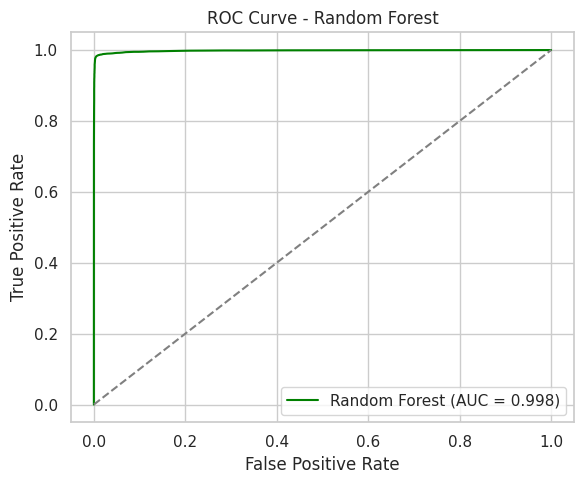

In [ ]:
# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(rfc_all_y_true, rfc_all_y_scores)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='green', label=f'Random Forest (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.title('ROC Curve - Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

plt.grid(True)
plt.tight_layout()
plt.show()

## Gradient Boosting Classifier with 5-Fold Cross-Validation

=== Overall Classification Report ===
              precision    recall  f1-score   support

       False       0.97      0.98      0.98      7999
        True       0.98      0.97      0.98      7999

    accuracy                           0.98     15998
   macro avg       0.98      0.98      0.98     15998
weighted avg       0.98      0.98      0.98     15998



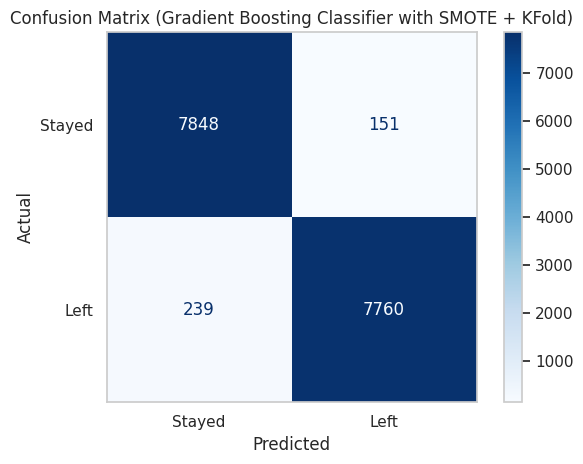

In [ ]:
# create the model object
gbc_model = GradientBoostingClassifier(random_state=123)

# define KFold object
kf = KFold(n_splits=5, shuffle=True, random_state=123)

gbc_all_y_true = []
gbc_all_y_pred = []
gbc_all_y_scores = []

for fold, (train_idx, test_idx) in enumerate(kf.split(X_train_smote), 1):

    # split the features and target into training and testing sets for this fold
    X_train, X_test = X_train_smote.iloc[train_idx], X_train_smote.iloc[test_idx]
    y_train, y_test = y_train_smote.iloc[train_idx], y_train_smote.iloc[test_idx]

    # clone model to prevent it from retaining internal state
    model_clone = clone(gbc_model)

    # fit the model on the current fold's training data
    model_clone.fit(X_train, y_train)

    # predict on test sets
    y_test_pred = model_clone.predict(X_test)
    y_test_proba = model_clone.predict_proba(X_test)[:, 1]

    # accumulate the true target values from this fold
    gbc_all_y_true.extend(y_test.tolist())

    # accumulate predicted class labels
    gbc_all_y_pred.extend(y_test_pred.tolist())

    # accumulate predicted probabilities for ROC curve
    gbc_all_y_scores.extend(y_test_proba.tolist())

# classification report
print('=== Overall Classification Report ===')
print(classification_report(gbc_all_y_true, gbc_all_y_pred))

# confusion Matrix
gbc_cm = confusion_matrix(gbc_all_y_true, gbc_all_y_pred)

gbc_cm_display = ConfusionMatrixDisplay(confusion_matrix = gbc_cm, display_labels = ['Stayed', 'Left'])

gbc_cm_display.plot(cmap='Blues')
gbc_cm_display.ax_.set_title('Confusion Matrix (Gradient Boosting Classifier with SMOTE + KFold)')
gbc_cm_display.ax_.set_xlabel('Predicted')
gbc_cm_display.ax_.set_ylabel('Actual')

plt.grid(False)

plt.tight_layout()
plt.show()

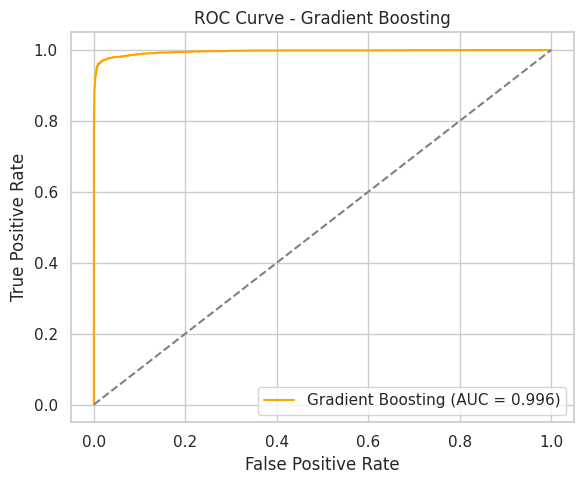

In [ ]:
# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(gbc_all_y_true, gbc_all_y_scores)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='orange', label=f'Gradient Boosting (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.title('ROC Curve - Gradient Boosting')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Model Evaluation

Based on the results, the Random Forest classifier demonstrated the highest performance with an AUC of 0.998, followed closely by Gradient Boosting with an AUC of 0.996. Logistic Regression showed a lower performance, with an AUC of 0.901. The ROC curve and AUC were used to evaluate the models' ability to distinguish between the two classes across all possible classification thresholds. A higher AUC indicates better class separation, making Random Forest the most effective model overall.

The confusion matrices further reinforced these findings. Random Forest accurately classified the majority of cases, with only 31 false positives and 164 false negatives. Gradient Boosting also performed strongly, though it incurred slightly more errors. Logistic Regression produced the most misclassifications, especially in predicting employees who actually left.

When interpreting the confusion matrices, recall is the more important metric to consider. In the context of employee attrition prediction, it is more critical to correctly identify individuals who are likely to leave than to incorrectly predict departures for those who will stay. The cost of failing to detect a true leaver is higher than the cost of a false positive, making recall the most relevant metric for evaluating model performance in this scenario.

# Retention Strategy Recommendations for Targeted Employees

Through the clustering of employees it was previously discovered that the employees were divided into three groups.

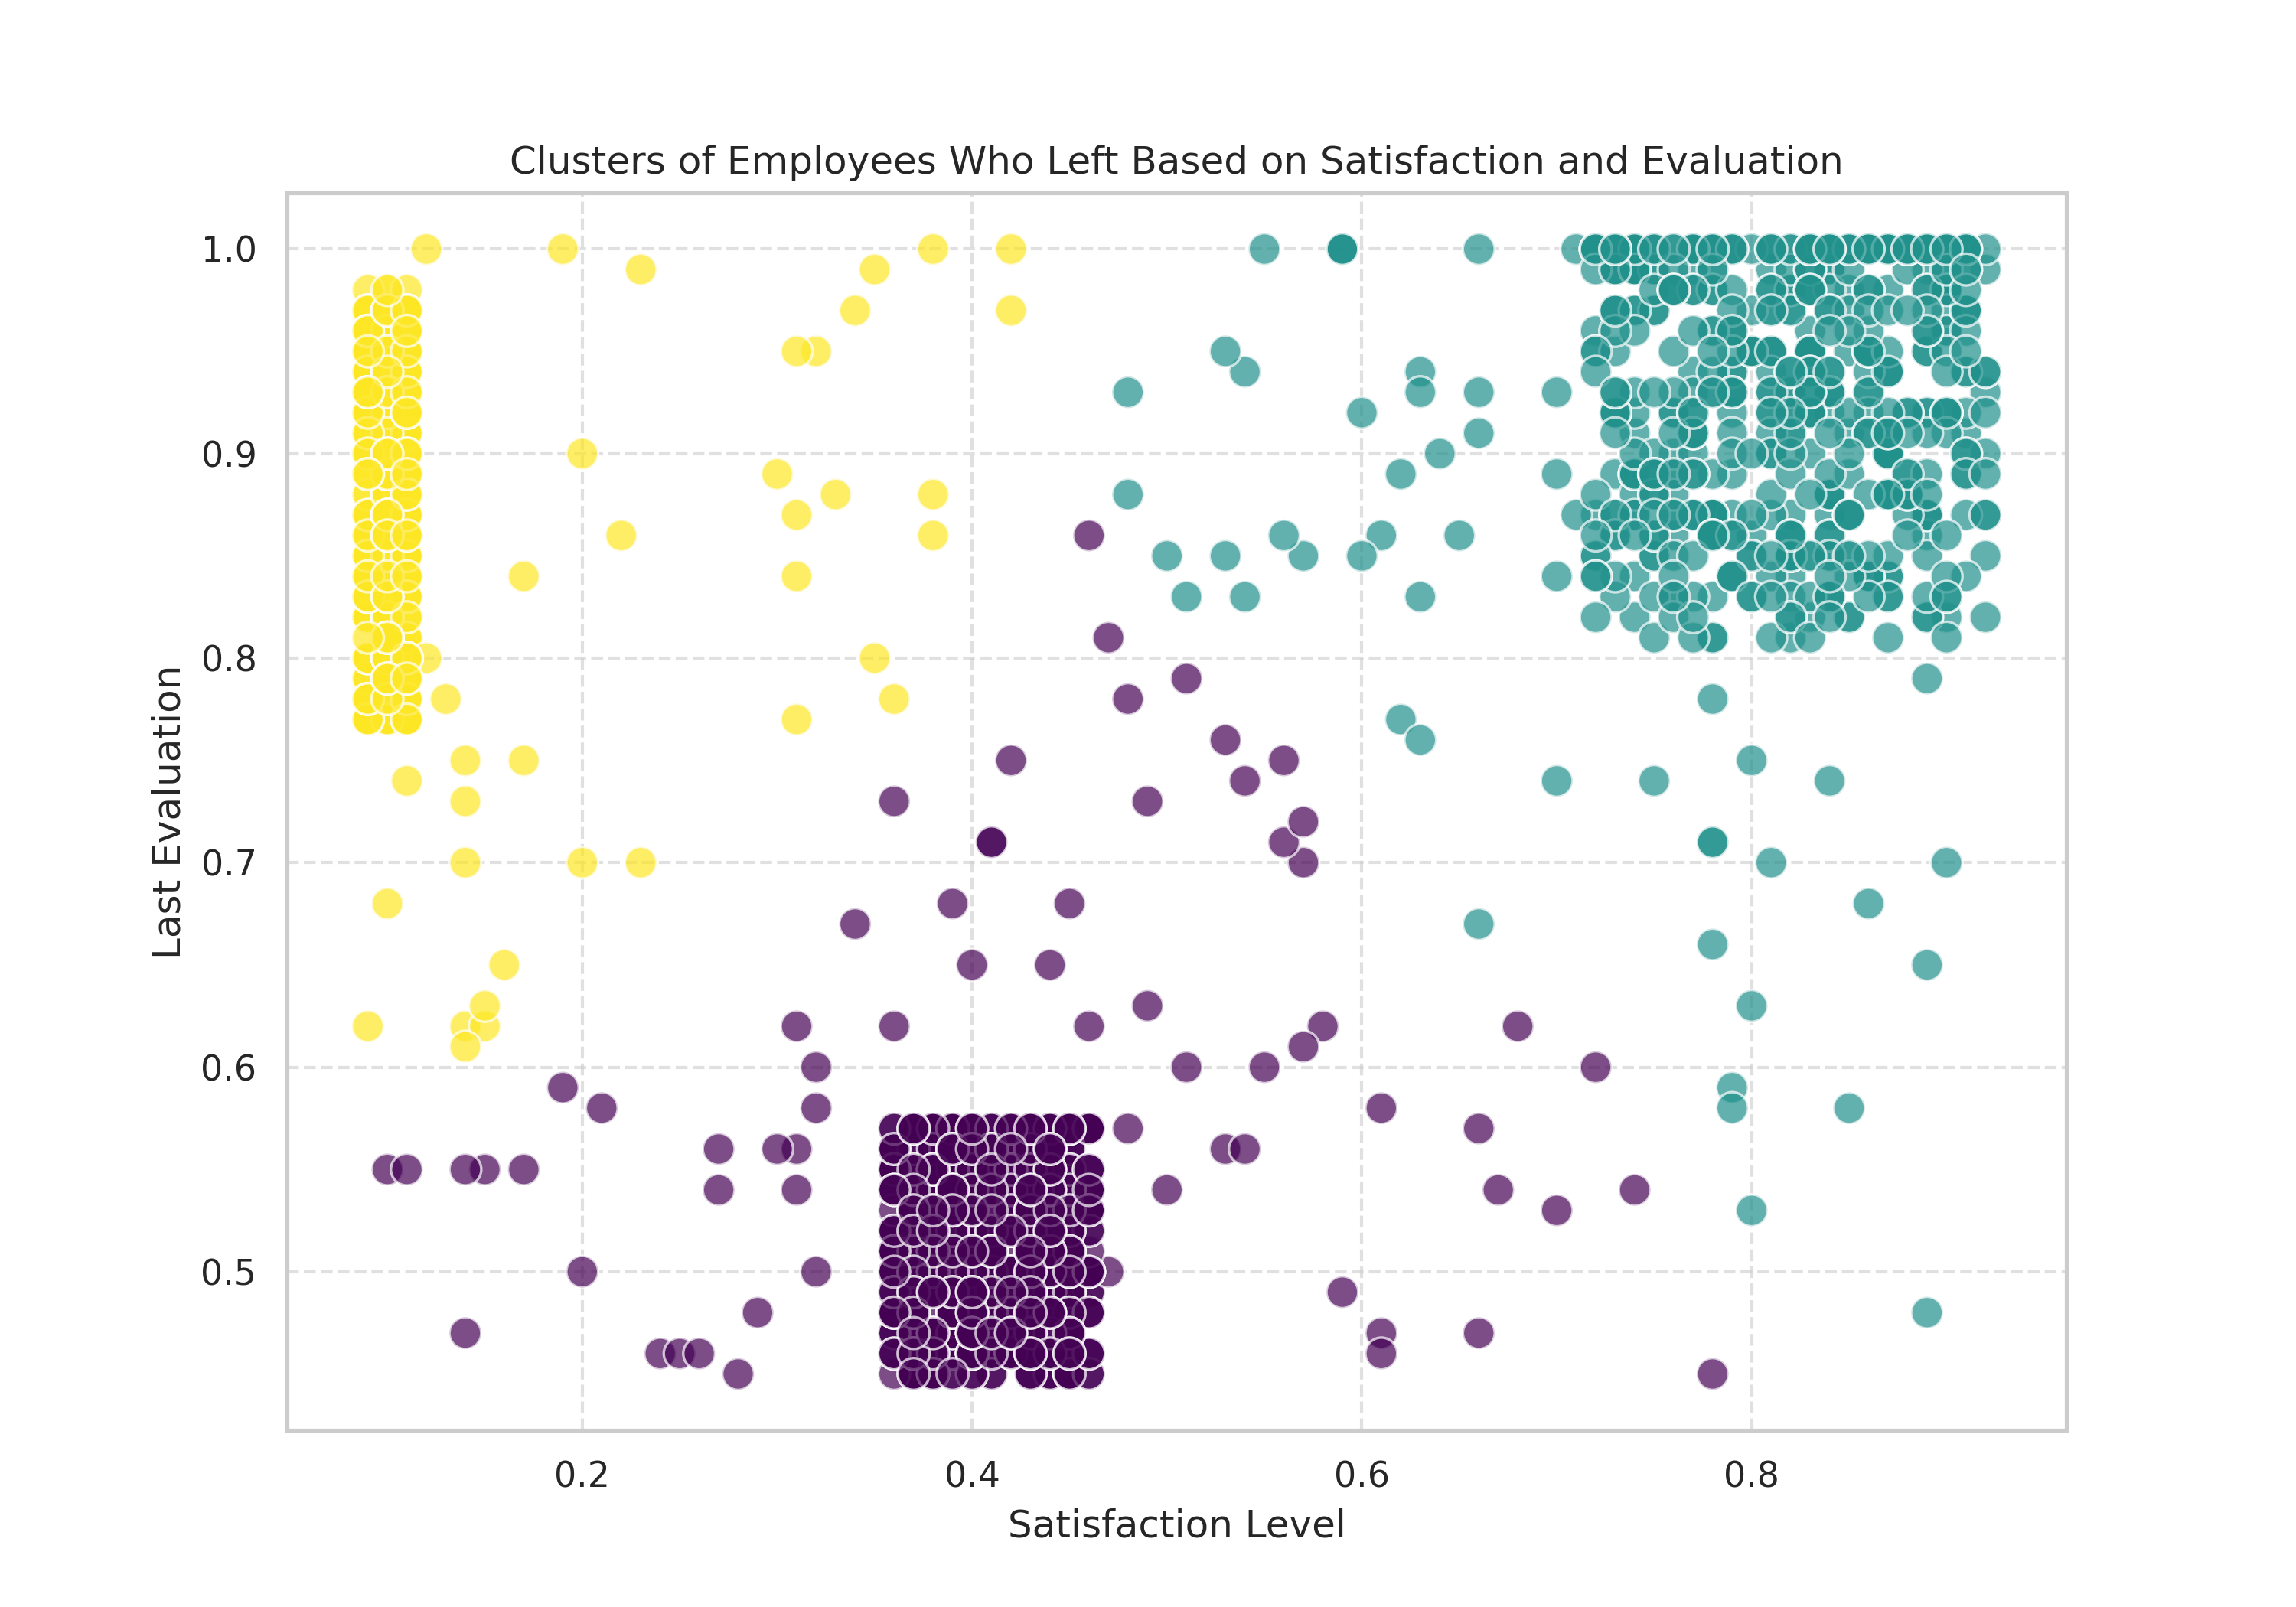

In [ ]:
# @title
Image('employee_clusters.png', width=800)

Purple Cluster: These are unsatisfied and low-performing employees who may be disengaged and lacking support. To retain them, the company should provide targeted upskilling, set clear goals, offer mentorship, and conduct interviews to understand their challenges and set an improvement plan.

Teal Cluster: These employees were satisfied and high-performing but still chose to leave, likely due to unmet career expectations or external opportunities. Retention efforts should focus on offering advancement paths, competitive compensation, and regular career check-ins to keep them invested.

Yellow Cluster: High-performing yet deeply dissatisfied employees, likely experiencing burnout or feeling unrecognized. To retain them, employers should implement strong recognition programs, reduce workload stress, offer flexible work options, and ensure supportive leadership and feedback.

# Prediction of the Probability of Employee Turnover

In [ ]:
# using the Random Forest Classifier since it was determined to be the best model
# fit model on training data
rfc_model.fit(X_train_smote, y_train_smote)

# predict the probability of turnover on the test set
turnover_proba = rfc_model.predict_proba(X_test)[:, 1]

# define risk zones
def classify_risk(score):
    if score < 0.2:
        return 'Safe'
    elif score < 0.6:
        return 'Low Risk'
    elif score < 0.9:
        return 'Medium Risk'
    else:
        return 'High Risk'

# clone test data
test_results = X_test.copy()

# add predicted probabilities to test data
test_results['turnover_proba'] = turnover_proba

# categorize each employee into a risk zone
test_results['risk_zone'] = test_results['turnover_proba'].apply(classify_risk)

test_results[['turnover_proba', 'risk_zone']].head()

,turnover_proba,risk_zone
13,0.99,High Risk
16,0.02,Safe
17,0.02,Safe
22,0.00,Safe
26,0.02,Safe


# Retention Strategy by Employee Risk Zone

Safe Zone (Green, Score < 20%)
These employees are happy and engaged, and there's little chance they'll leave. Keep the momentum going by recognizing their efforts, giving them chances to grow, and making sure the work environment stays positive and supportive.

Low-Risk Zone (Yellow, Score 20%–60%)
People in this zone are generally doing fine, but they could start thinking about leaving if things change or if they feel overlooked. Regular check-ins, opportunities to learn new skills, and keeping a good work-life balance can go a long way in keeping them motivated.

Medium-Risk Zone (Orange, Score 60%–90%)
This group is showing signs that they’re not fully satisfied or feeling disconnected. It’s important to take action now! Talk to them, offer paths to grow within the company, and make sure they feel valued and heard.

High-Risk Zone (Red, Score > 90%)
These employees are seriously thinking about leaving, and it’s critical to step in fast. Try to understand what’s going wrong from their perspective and see if anything can be done.

Prioritize high-risk employees first before they leave! Check in with employees regularly to prevent issues from building up, understand what they need, and show that the company genuinely cares about their experience. Staying proactive can make a big difference in keeping people engaged and committed.